In [2]:
!pip install pandas pandas_ta yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=d6256271bd65d82fd6a23492bc59422e9d64e6e9159136774744b05139828295
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [48]:
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt


tickers = ['MSFT', 'AMZN', 'GOOGL', 'TSLA', 'NFLX']
stock_data = {}
start_date = "2015-01-01"
end_date = "2020-01-01"

for ticker in tickers:
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)


for ticker in tickers:
    stock_data[ticker]['MACD'] = ta.macd(stock_data[ticker]['Close'])['MACD_12_26_9']
    stock_data[ticker]['MACD_Histogram'] = ta.macd(stock_data[ticker]['Close'])['MACDh_12_26_9']
    stock_data[ticker]['MACD_Signal'] = ta.macd(stock_data[ticker]['Close'])['MACDs_12_26_9']



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


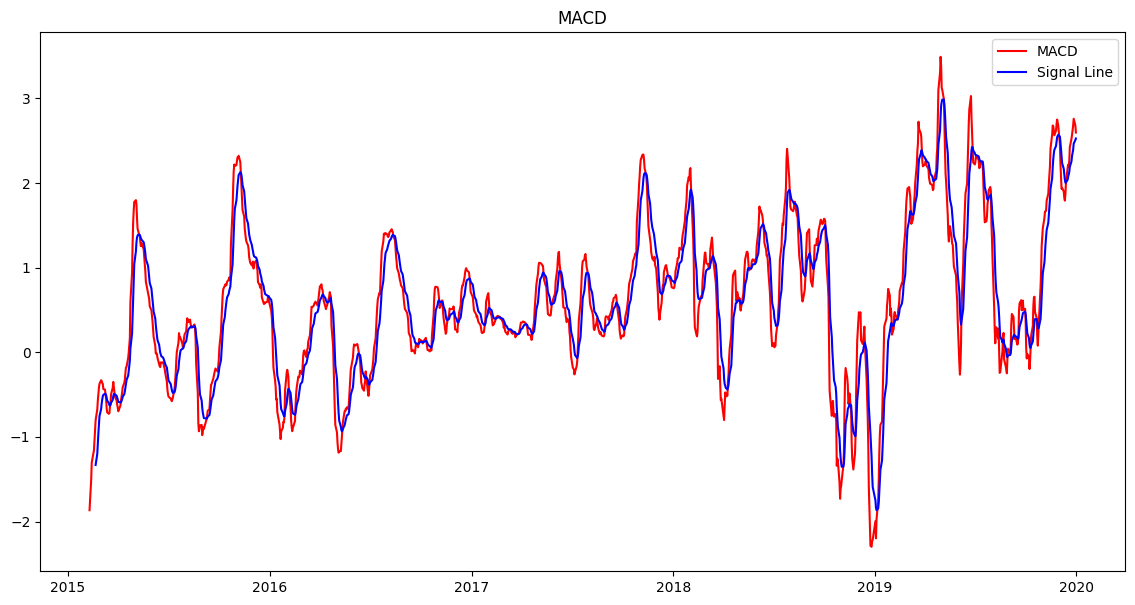

In [49]:
import matplotlib.pyplot as plt

ticker = 'MSFT'

plt.figure(figsize=(14, 7))
plt.plot(stock_data[ticker]['MACD'], label='MACD', color='red')
plt.plot(stock_data[ticker]['MACD_Signal'], label='Signal Line', color='blue')
plt.title("MACD")
plt.legend()
plt.show()

In [50]:
for ticker in tickers:
    macd = ta.macd(stock_data[ticker]['Close'])
    stock_data[ticker] = stock_data[ticker].join(macd)

    stock_data[ticker]['RSI'] = ta.rsi(stock_data[ticker]['Close'])

    bollinger = ta.bbands(stock_data[ticker]['Close'])
    stock_data[ticker] = stock_data[ticker].join(bollinger)


In [51]:
for ticker in tickers:
    stock_data[ticker]['SMA_50'] = ta.sma(stock_data[ticker]['Close'], 50)
    stock_data[ticker]['SMA_200'] = ta.sma(stock_data[ticker]['Close'], 200)


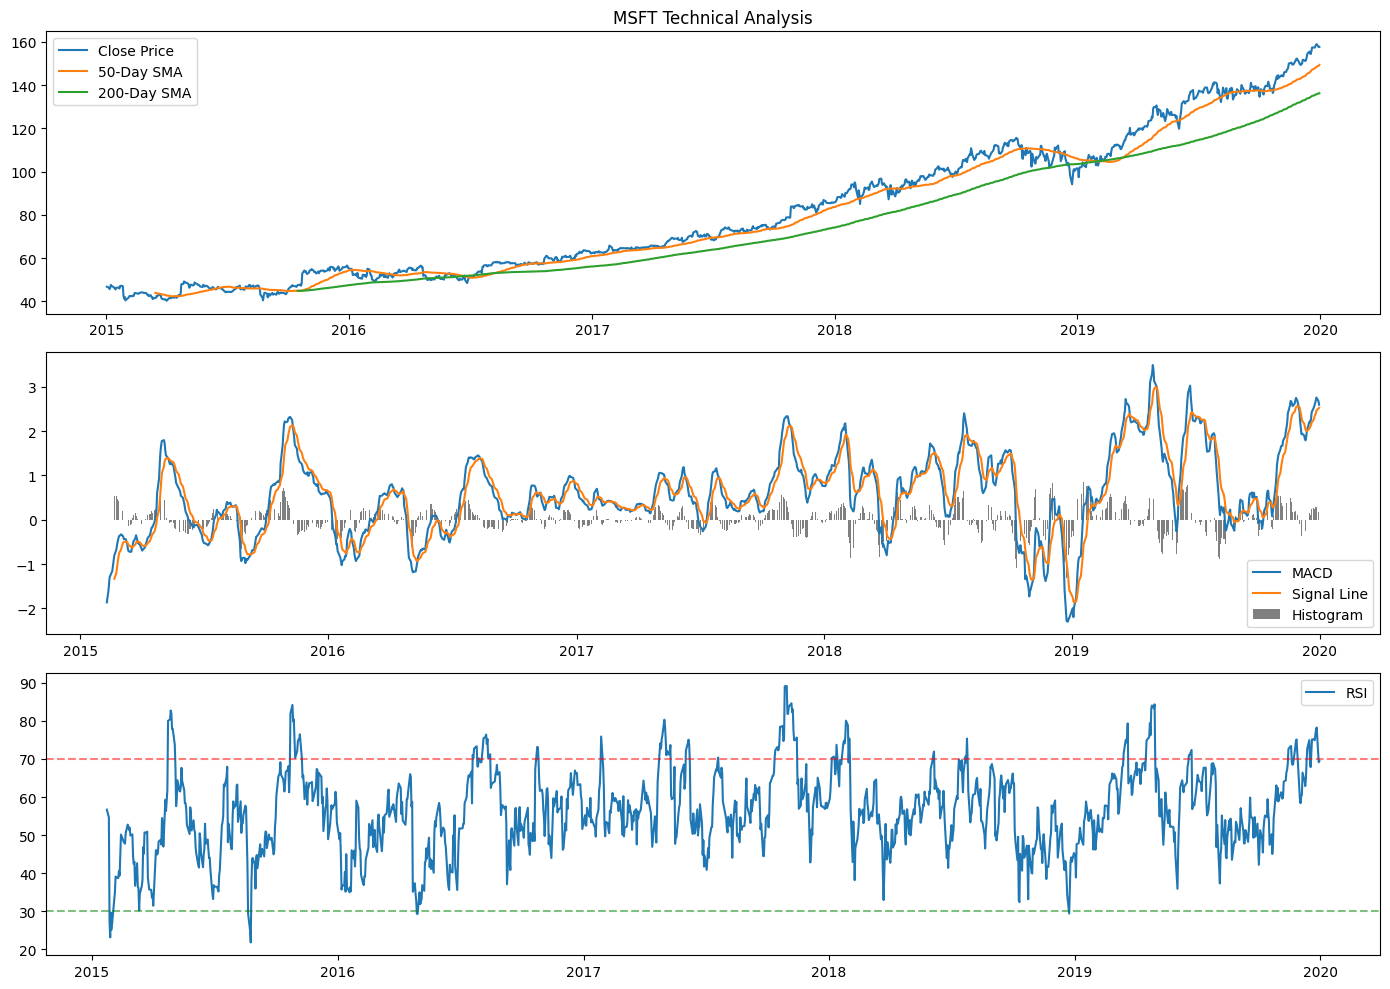

In [54]:
ticker = 'MSFT'

plt.figure(figsize=(14, 10))

plt.subplot(311)
plt.plot(stock_data[ticker]['Close'], label='Close Price')
plt.plot(stock_data[ticker]['SMA_50'], label='50-Day SMA')
plt.plot(stock_data[ticker]['SMA_200'], label='200-Day SMA')
plt.title(f"{ticker} Technical Analysis")
plt.legend()

plt.subplot(312)
plt.plot(stock_data[ticker]['MACD_12_26_9'], label='MACD')
plt.plot(stock_data[ticker]['MACDs_12_26_9'], label='Signal Line')
plt.bar(stock_data[ticker].index, stock_data[ticker]['MACDh_12_26_9'], label='Histogram', color='grey')
plt.legend()

plt.subplot(313)
plt.plot(stock_data[ticker]['RSI'], label='RSI')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.legend()

plt.tight_layout()
plt.show()


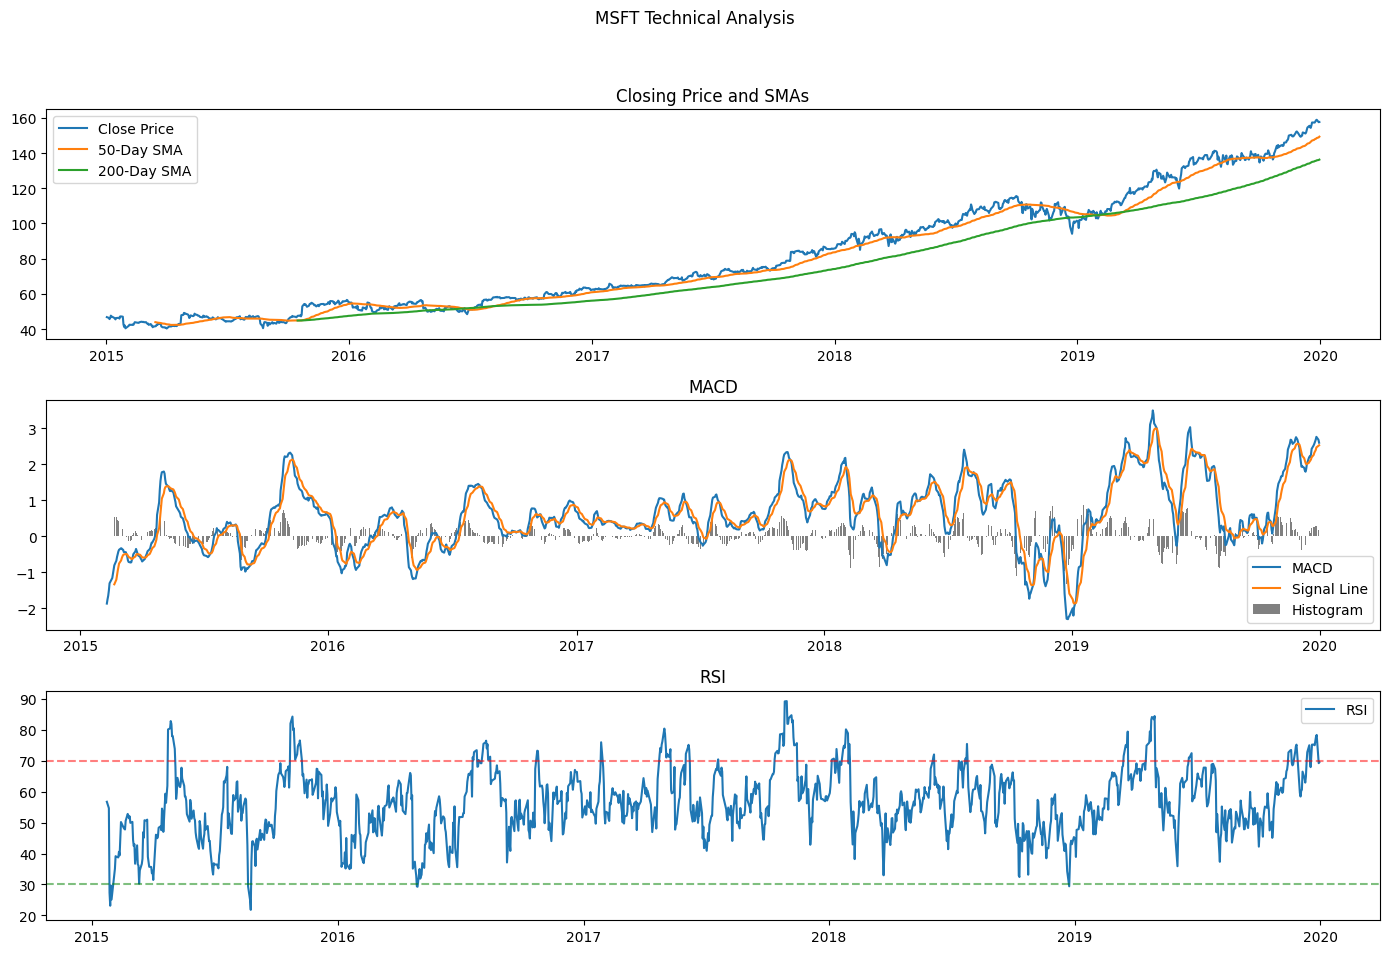

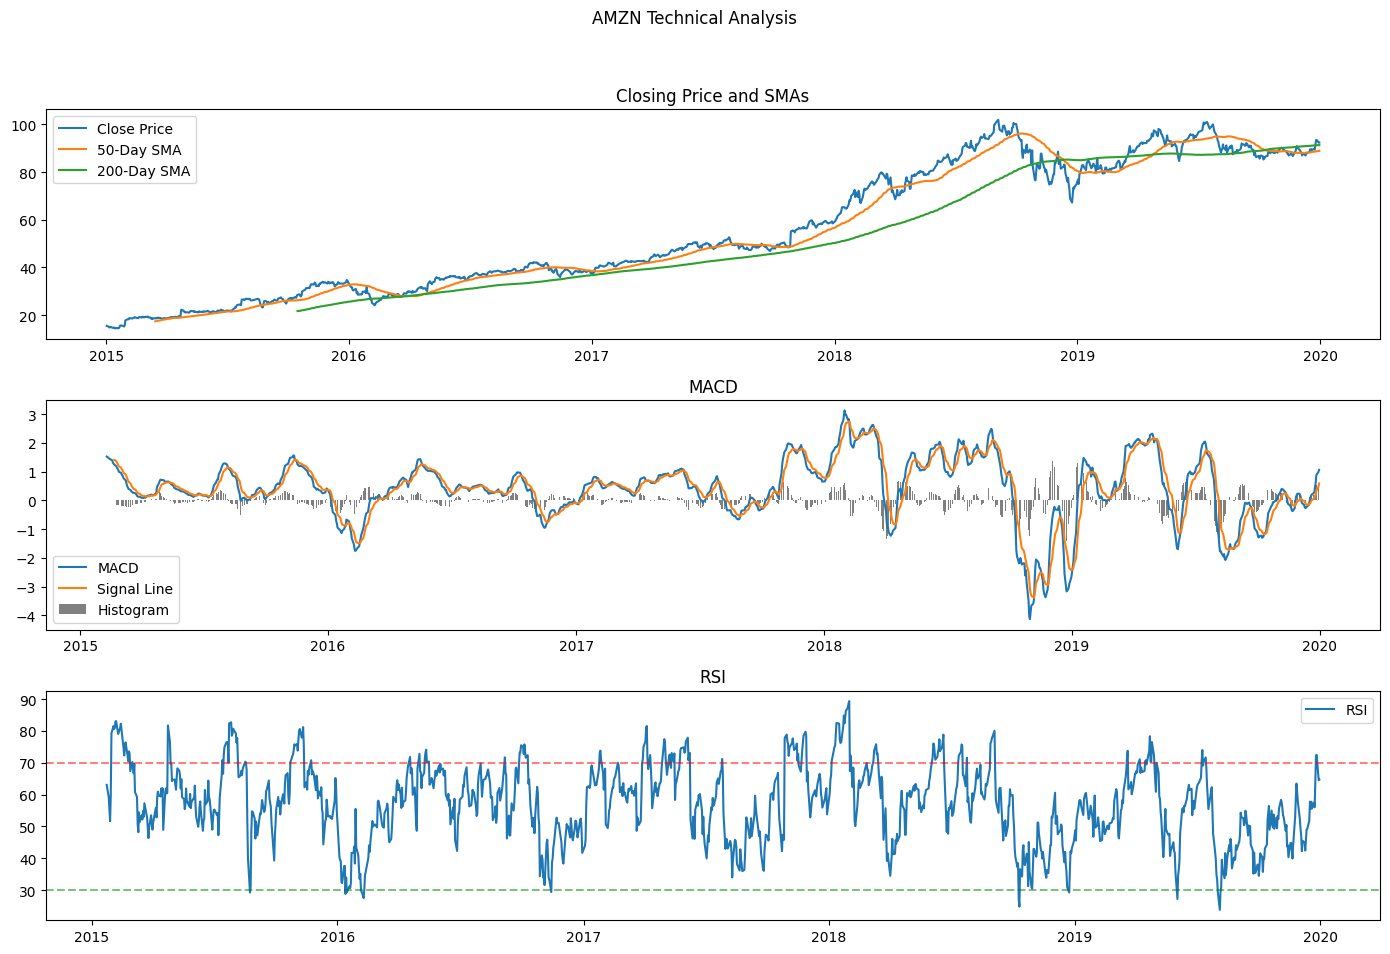

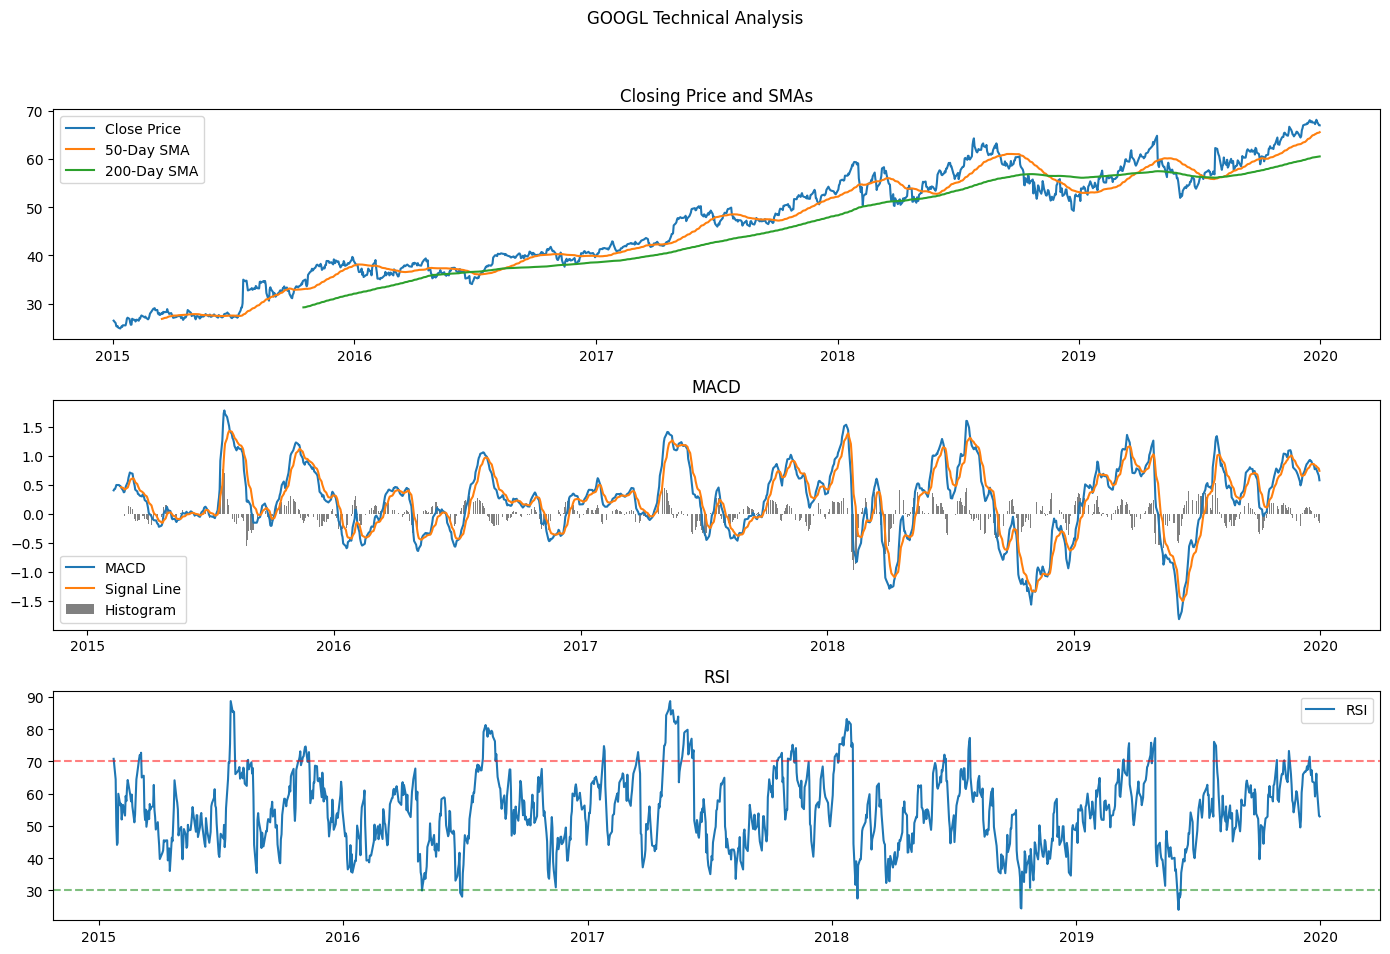

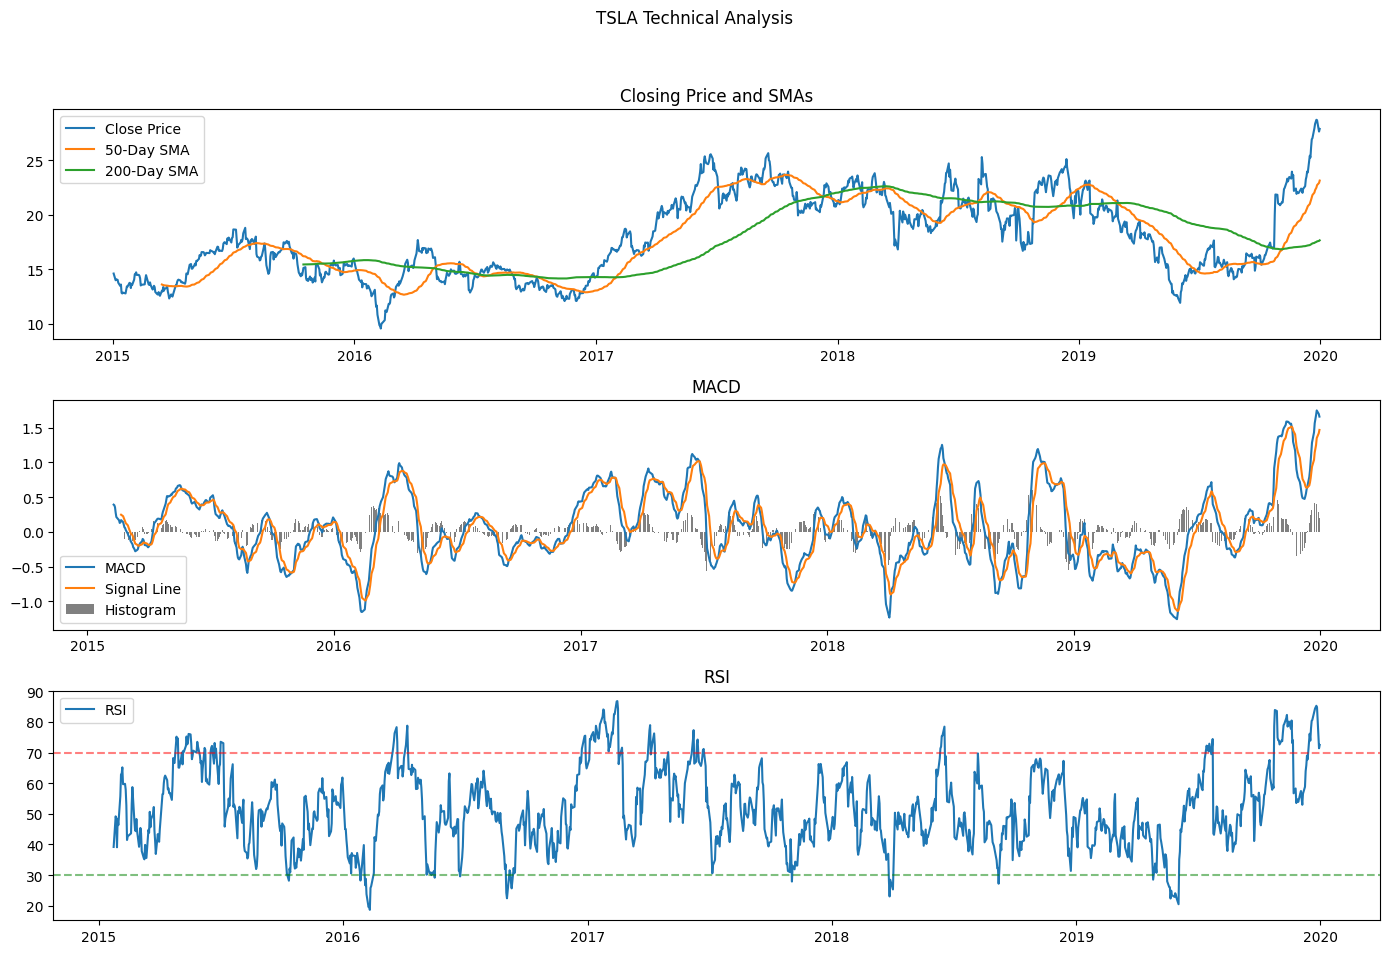

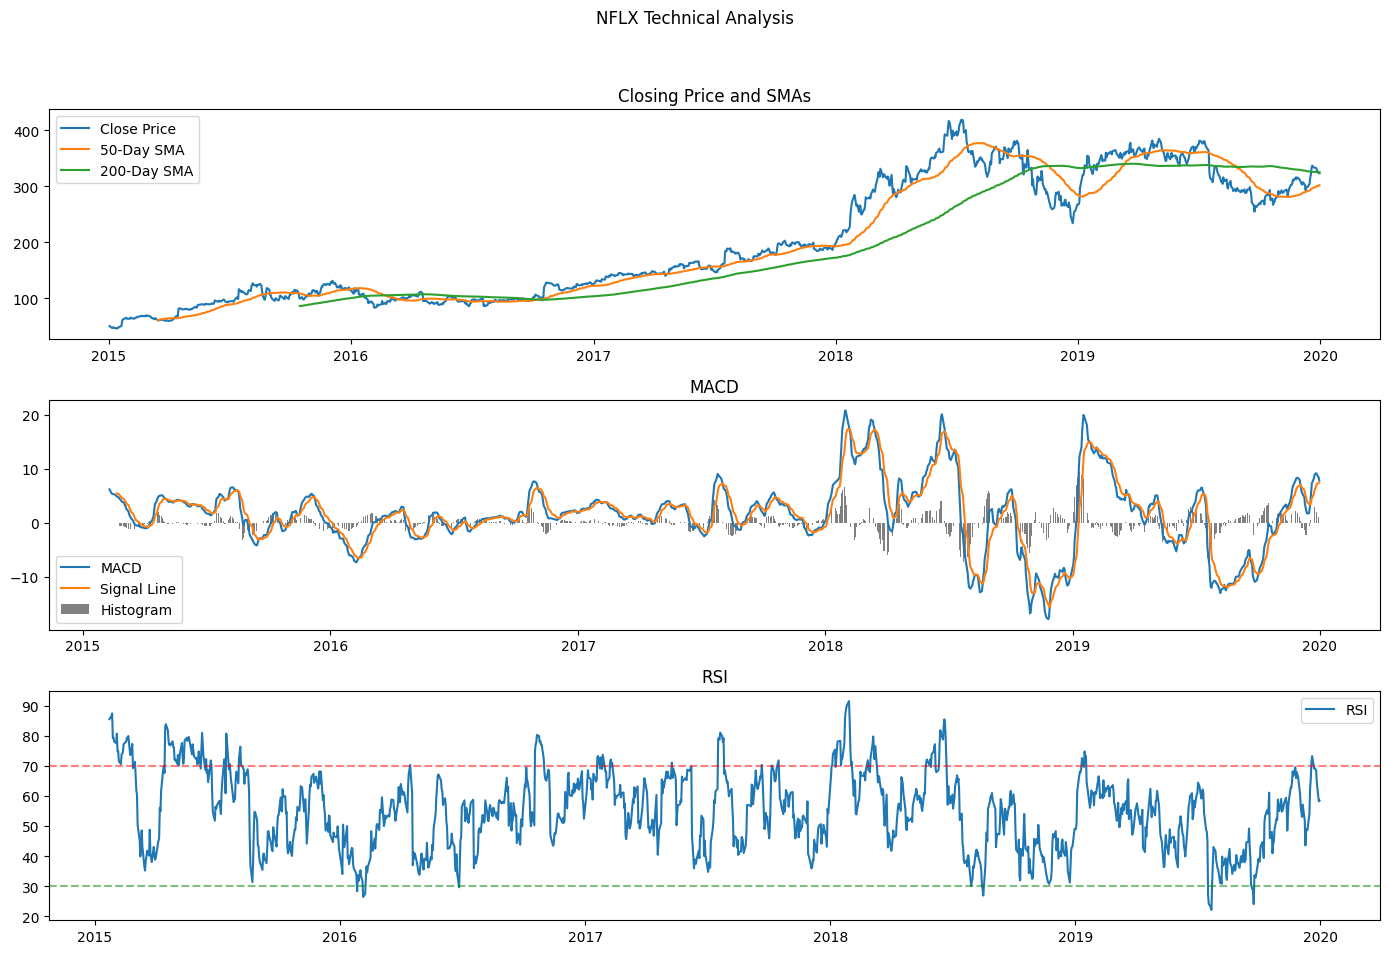

In [53]:
for ticker in tickers:
    plt.figure(figsize=(14, 10))
    plt.suptitle(f'{ticker} Technical Analysis')

    # Closing Price and SMAs
    plt.subplot(311)
    plt.plot(stock_data[ticker]['Close'], label='Close Price')
    plt.plot(stock_data[ticker]['SMA_50'], label='50-Day SMA')
    plt.plot(stock_data[ticker]['SMA_200'], label='200-Day SMA')
    plt.title('Closing Price and SMAs')
    plt.legend()

    # MACD
    plt.subplot(312)
    plt.plot(stock_data[ticker]['MACD'], label='MACD')
    plt.plot(stock_data[ticker]['MACDs_12_26_9'], label='Signal Line')
    plt.bar(stock_data[ticker].index, stock_data[ticker]['MACDh_12_26_9'], label='Histogram', color='grey')
    plt.title('MACD')
    plt.legend()

    # RSI
    plt.subplot(313)
    plt.plot(stock_data[ticker]['RSI'], label='RSI')
    plt.axhline(70, linestyle='--', alpha=0.5, color='red')
    plt.axhline(30, linestyle='--', alpha=0.5, color='green')
    plt.title('RSI')
    plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
